Color blindness occurs when you are unable to see colors in a normal way. It is also known as color deficiency. Color blindness often happens when someone cannot distinguish between certain colors.

Objective: Improve object recognition for colorblind users by enhancing the edges between colors they struggle to distinguish.

Steps:

Read an image in RGB.\
Convert it to Lab color space.\
Extract the "a" or "b" channel, depending on the type of color blindness (e.g., "a" for red-green and "b" for blue-yellow).\
Apply an edge detection algorithm (Sobel, Canny) on the extracted channel.
Overlay detected edges onto the original image to highlight color differences.

## a channel edge detection with sobal


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import sobel
from scipy.ndimage import binary_dilation
import cv2
from skimage.filters import sobel


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
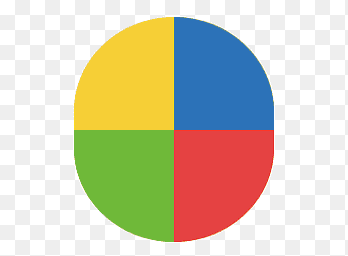

In [74]:
# Load an image
image = io.imread('/content/png-clipart-radial-icon-set-2-avg-yellow-blue-red-and-green-color-collage-thumbnail.png')
image

In [4]:
# Convert to Lab color space
image_lab = color.rgb2lab(image)

In [5]:
# Extract 'a' channel (Red-Green contrast)
a_channel = image_lab[:, :, 1]

In [91]:
# Extract 'b' channel (Blue-Yellow contrast) - To Exclude These Areas
b_channel = image_lab[:, :, 2]

In [92]:
# Define Masks for Red and Green Regions
red_mask = a_channel > 10   # Positive 'a' values → Red
green_mask = a_channel < -10  # Negative 'a' values → Green

In [93]:
# Apply Sobel Edge Detection to Find Boundaries
edges = sobel(a_channel)

In [97]:
# Create a Mask for Only Red-Green Boundaries
red_green_edges = edges * (red_mask & np.roll(green_mask, 1, axis=1))  # Left side
red_green_edges += edges * (red_mask & np.roll(green_mask, -1, axis=1))  # Right side
red_green_edges += edges * (red_mask & np.roll(green_mask, 1, axis=0))  # Top side
red_green_edges += edges * (red_mask & np.roll(green_mask, -1, axis=0))  # Bottom side


In [98]:
# **Increase Edge Thickness using Dilation**
red_green_edges = binary_dilation(red_green_edges, structure=np.ones((5,5)))  # Thicker edges

# **Enhance Edge Brightness**
edge_intensity_factor = 25  # Maximize white intensity
red_green_edges = np.clip(red_green_edges * edge_intensity_factor, 0, 1)

In [99]:
# **Convert to RGB for Overlay**
white_edges = np.dstack([red_green_edges, red_green_edges, red_green_edges])  # Pure white

# **Overlay on Original Image with Intense White Edges**
overlay_image_white = np.clip(image / 255.0 + white_edges, 0, 1)


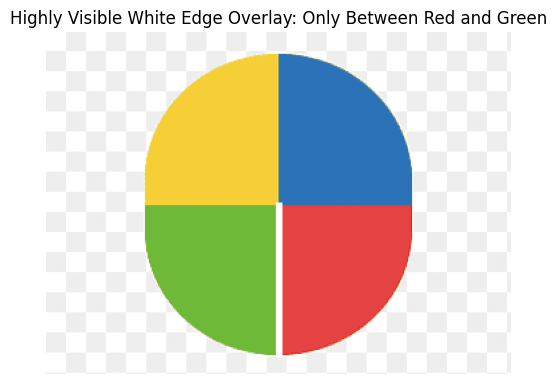

In [101]:
# **Display the Final Image**
plt.figure(figsize=(6,6))
plt.imshow(overlay_image_white)
plt.title("Highly Visible White Edge Overlay: Only Between Red and Green")
plt.axis("off")
plt.show()


## b channel edge detection with sobal

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from skimage.filters import sobel
from scipy.ndimage import binary_dilation
import cv2
from skimage.filters import sobel

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[  0,   0,   0],
        [252, 221,   9],
        [252, 221,   9],
        ...,
        [252, 222,   8],
        [252, 222,   8],
        [252, 221,   8]],

       [[  0,   0,   0],
        [252, 222,   9],
        [252, 221,   9],
        ...,
        [252, 221,   9],
        [252, 221,   9],
        [252, 221,   9]],

       [[  0,   0,   0],
        [252, 221,   9],
        [252, 221,   9],
        ...,
        [252, 221,   9],
        [252, 221,   9],
        [252, 221,   9]],

       ...,

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]],

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]],

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]]], dtype=uint8)
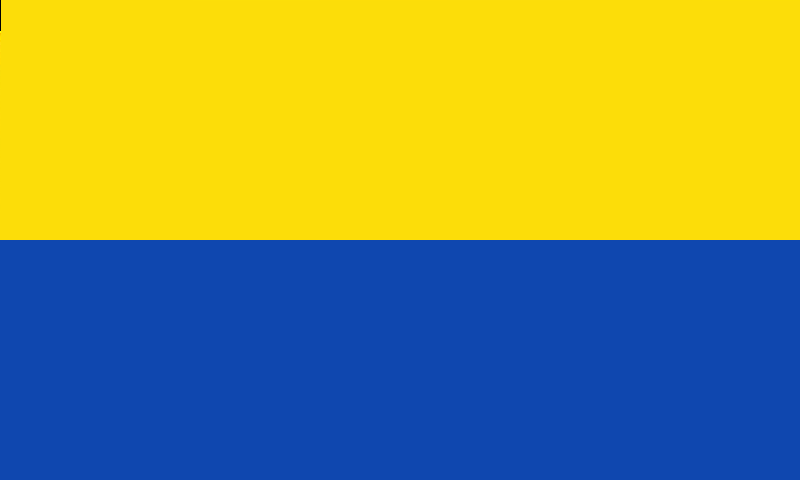

In [82]:
# Load an image
image = io.imread('/content/Flag_yellow_blue.svg.png')
image

In [83]:
# Convert to Lab color space
image_lab = color.rgb2lab(image)

In [84]:
# Extract 'a' channel (Red-Green contrast)
a_channel = image_lab[:, :, 1]

In [102]:
# Extract 'b' channel (Blue-Yellow contrast) - To Exclude These Areas
b_channel = image_lab[:, :, 2]


In [103]:
# Define Masks for Blue and Yellow Regions
blue_mask = b_channel < -10   # Negative 'b' values → Blue
yellow_mask = b_channel > 10  # Positive 'b' values → Yellow

# Apply Sobel Edge Detection to Find Boundaries
edges = sobel(b_channel)

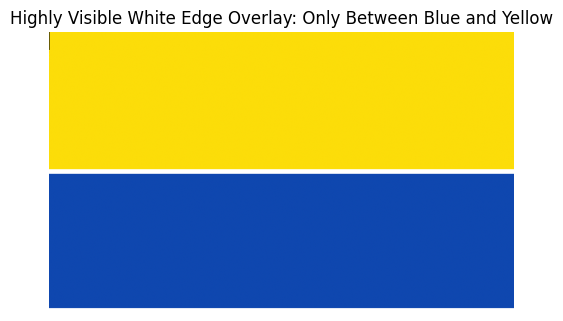

In [87]:
# Create a Mask for Only Blue-Yellow Boundaries
blue_yellow_edges = edges * (blue_mask & np.roll(yellow_mask, 1, axis=1))  # Left side
blue_yellow_edges += edges * (blue_mask & np.roll(yellow_mask, -1, axis=1))  # Right side
blue_yellow_edges += edges * (blue_mask & np.roll(yellow_mask, 1, axis=0))  # Top side
blue_yellow_edges += edges * (blue_mask & np.roll(yellow_mask, -1, axis=0))  # Bottom side

# Increase Edge Thickness using Dilation
blue_yellow_edges = binary_dilation(blue_yellow_edges, structure=np.ones((8,8)))  # Thicker edges

# Enhance Edge Brightness
edge_intensity_factor = 25  # Maximize white intensity
blue_yellow_edges = np.clip(blue_yellow_edges * edge_intensity_factor, 0, 1)

# Convert to RGB for Overlay
white_edges = np.dstack([blue_yellow_edges, blue_yellow_edges, blue_yellow_edges])  # Pure white

# Overlay on Original Image with Intense White Edges
overlay_image_white = np.clip(image / 255.0 + white_edges, 0, 1)

# Display the Final Image
plt.figure(figsize=(6,6))
plt.imshow(overlay_image_white)
plt.title("Highly Visible White Edge Overlay: Only Between Blue and Yellow")
plt.axis("off")
plt.show()



## a channal edge detection with canny


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology
from scipy.ndimage import binary_dilation
import cv2


In [89]:
# Load an image
image = io.imread('/content/png-clipart-radial-icon-set-2-avg-yellow-blue-red-and-green-color-collage-thumbnail.png')

In [106]:
# Convert to Lab color space
image_lab = color.rgb2lab(image)

# Extract 'a' channel (Red-Green contrast)
a_channel = image_lab[:, :, 1]

# Extract 'b' channel (Blue-Yellow contrast) - To Exclude These Areas
b_channel = image_lab[:, :, 2]

# Define Masks for Red and Green Regions
red_mask = a_channel > 10   # Positive 'a' values → Red
green_mask = a_channel < -10  # Negative 'a' values → Green

In [105]:
# Apply Canny Edge Detection to Find Boundaries
edges = cv2.Canny((a_channel * 255).astype(np.uint8), 100, 200)

# Convert edges to boolean mask
edges = edges.astype(bool)

In [104]:
# Create a Mask for Only Red-Green Boundaries
red_green_edges = edges * (red_mask & np.roll(green_mask, 1, axis=1))  # Left side
red_green_edges += edges * (red_mask & np.roll(green_mask, -1, axis=1))  # Right side
red_green_edges += edges * (red_mask & np.roll(green_mask, 1, axis=0))  # Top side
red_green_edges += edges * (red_mask & np.roll(green_mask, -1, axis=0))  # Bottom side

# **Increase Edge Thickness using Dilation**
red_green_edges = binary_dilation(red_green_edges, structure=np.ones((5,5)))  # Thicker edges

# **Enhance Edge Brightness**
edge_intensity_factor = 25  # Maximize white intensity
red_green_edges = np.clip(red_green_edges * edge_intensity_factor, 0, 1)

# **Convert to RGB for Overlay**
white_edges = np.dstack([red_green_edges, red_green_edges, red_green_edges])  # Pure white

# **Overlay on Original Image with Intense White Edges**
overlay_image_white = np.clip(image / 255.0 + white_edges, 0, 1)

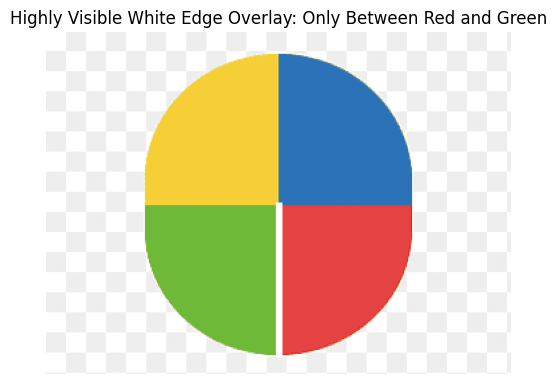

In [107]:
# **Display the Final Image**
plt.figure(figsize=(6,6))
plt.imshow(overlay_image_white)
plt.title("Highly Visible White Edge Overlay: Only Between Red and Green")
plt.axis("off")
plt.show()

## b channel edge detection with canny

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation
import cv2  # OpenCV for Canny edge detection


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[  0,   0,   0],
        [252, 221,   9],
        [252, 221,   9],
        ...,
        [252, 222,   8],
        [252, 222,   8],
        [252, 221,   8]],

       [[  0,   0,   0],
        [252, 222,   9],
        [252, 221,   9],
        ...,
        [252, 221,   9],
        [252, 221,   9],
        [252, 221,   9]],

       [[  0,   0,   0],
        [252, 221,   9],
        [252, 221,   9],
        ...,
        [252, 221,   9],
        [252, 221,   9],
        [252, 221,   9]],

       ...,

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]],

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]],

       [[ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175],
        ...,
        [ 15,  71, 175],
        [ 15,  71, 175],
        [ 15,  71, 175]]], dtype=uint8)
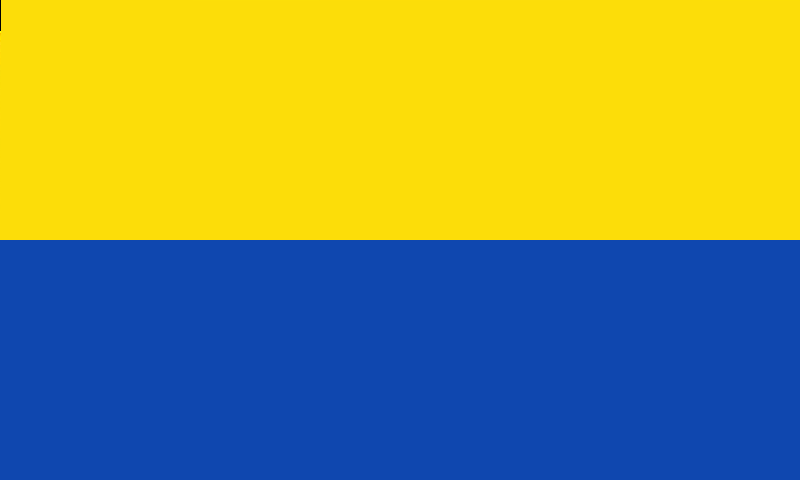

In [109]:
# Load an image
image = io.imread('/content/Flag_yellow_blue.svg.png')
image

In [110]:
# Convert to Lab color space
image_lab = color.rgb2lab(image)

In [114]:
# Extract 'a' channel (Red-Green contrast)
a_channel = image_lab[:, :, 1]

In [115]:
# Extract 'b' channel (Blue-Yellow contrast) - To Exclude These Areas
b_channel = image_lab[:, :, 2]


In [116]:
# Define Masks for Blue and Yellow Regions
blue_mask = b_channel < -10   # Negative 'b' values → Blue
yellow_mask = b_channel > 10  # Positive 'b' values → Yellow


In [117]:
# Apply Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200) / 255.0  # Normalize to 0-1 range

In [118]:
# Create a Mask for Only Blue-Yellow Boundaries
blue_yellow_edges = canny_edges * (blue_mask & np.roll(yellow_mask, 1, axis=1))  # Left side
blue_yellow_edges += canny_edges * (blue_mask & np.roll(yellow_mask, -1, axis=1))  # Right side
blue_yellow_edges += canny_edges * (blue_mask & np.roll(yellow_mask, 1, axis=0))  # Top side
blue_yellow_edges += canny_edges * (blue_mask & np.roll(yellow_mask, -1, axis=0))  # Bottom side


In [119]:
# Increase Edge Thickness using Dilation
blue_yellow_edges = binary_dilation(blue_yellow_edges, structure=np.ones((8,8)))  # Thicker edges

# Enhance Edge Brightness
edge_intensity_factor = 25  # Maximize white intensity
blue_yellow_edges = np.clip(blue_yellow_edges * edge_intensity_factor, 0, 1)

# Convert to RGB for Overlay
white_edges = np.dstack([blue_yellow_edges, blue_yellow_edges, blue_yellow_edges])  # Pure white

# Overlay on Original Image with Intense White Edges
overlay_image_white = np.clip(image / 255.0 + white_edges, 0, 1)

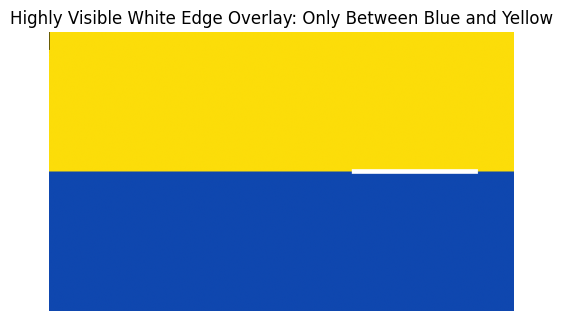

In [121]:
# Display the Final Image
plt.figure(figsize=(6,6))
plt.imshow(overlay_image_white)
plt.title("Highly Visible White Edge Overlay: Only Between Blue and Yellow")
plt.axis("off")
plt.show()
